In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(34)

# PG

In [2]:
def PG(Q,p,x0,Ntry=1000):
    n=np.shape(Q)[0]
    normQ = np.sqrt(np.sum(Q**2))
    Theta1 = np.eye(n) - Q/normQ
    theta2 = p/normQ
    x = np.copy(x0)
    x[x<0]=0.0
    for i in range(0,Ntry):
        x = np.dot(Theta1,x) + theta2
        x[x<0] = 0.0
    return x

In [3]:
def PGlog(Q,p,x0,A,b,Ntry=1000):
    n=np.shape(Q)[0]
    normQ = np.sqrt(np.sum(Q**2))
    Theta1 = np.eye(n) - Q/normQ
    theta2 = p/normQ
    x = np.copy(x0)
    x[x<0]=0.0
    res=[]
    for i in range(0,Ntry):
        x = np.dot(Theta1,x) + theta2
        x[x<0] = 0.0
        res.append(np.sum((np.dot(A,x) - b)**2))
    return x,np.array(res)

In [4]:
Nj=100
Nk=50
A=np.random.rand(Nk*Nj).reshape(Nk,Nj)
xini=np.random.rand(Nj)
b=np.dot(A,xini)
p=np.dot(A.T,b)
Q=np.dot(A.T,A)
x0=np.random.rand(Nj)

In [5]:
x1=PG(Q,p,x0,1000)

## Note: x1 does not converge to xini

In [6]:
np.sum((np.dot(A,x1) - b)**2)

0.16979316896516522

In [7]:
x1log,resPG=PGlog(Q,p,x0,A,b,1000)

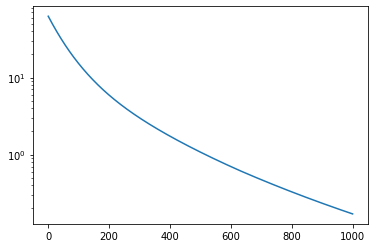

In [8]:
plt.figure()
plt.plot(resPG)
plt.yscale("log")

# APG 

In [9]:
def APG(Q,p,x0,Ntry=1000):
    n=np.shape(Q)[0]
    normQ = np.sqrt(np.sum(Q**2))
    Theta1 = np.eye(n) - Q/normQ
    theta2 = p/normQ
    x = np.copy(x0)
    y = np.copy(x0)
    x[x<0]=0.0
    alpha=1
    for i in range(0,Ntry):
        xp=np.copy(x)
        x = np.dot(Theta1,y) + theta2
        x[x<0] = 0.0
        dx=x-xp
        aa=alpha*alpha
        beta=alpha*(1.0-alpha)
        alpha=0.5*(np.sqrt(aa*aa + 4*aa) - aa)
        beta=beta/(alpha + aa)
        y=x+beta*dx
    return x

In [10]:
x2=APG(Q,p,x0,1000)

In [11]:
np.sum((np.dot(A,x2)-b)**2)

2.3806495227718512e-05

In [12]:
def APGlog(Q,p,x0,A,b,Ntry=1000):
    n=np.shape(Q)[0]
    normQ = np.sqrt(np.sum(Q**2))
    Theta1 = np.eye(n) - Q/normQ
    theta2 = p/normQ
    x = np.copy(x0)
    y = np.copy(x0)
    x[x<0]=0.0
    alpha=1
    res=[]
    for i in range(0,Ntry):
        xp=np.copy(x)
        x = np.dot(Theta1,y) + theta2
        x[x<0] = 0.0
        dx=x-xp
        aa=alpha*alpha
        beta=alpha*(1.0-alpha)
        alpha=0.5*(np.sqrt(aa*aa + 4*aa) - aa)
        beta=beta/(alpha + aa)
        y=x+beta*dx
        res.append(np.sum((np.dot(A,x) - b)**2))
    return x,np.array(res)

In [13]:
x2log,resAPG=APGlog(Q,p,x0,A,b,1000)

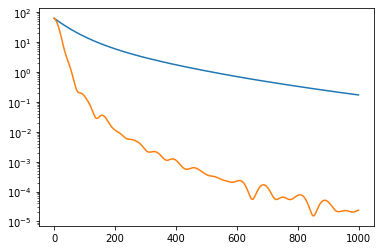

In [14]:
plt.figure()
plt.plot(resPG)
plt.plot(resAPG)
plt.yscale("log")

# APG+restart

In [15]:
def APGr(Q,p,x0,Ntry=1000,alpha0=1.0):
    n=np.shape(Q)[0]
    normQ = np.sqrt(np.sum(Q**2))
    Theta1 = np.eye(n) - Q/normQ
    theta2 = p/normQ
    x = np.copy(x0)
    y = np.copy(x0)
    x[x<0]=0.0
    alpha=alpha0
    costp=0.5*np.dot(x0,np.dot(Q,x0)) - np.dot(p,x0)
    for i in range(0,Ntry):
        xp=np.copy(x)
        x = np.dot(Theta1,y) + theta2
        x[x<0] = 0.0
        dx=x-xp
        aa=alpha*alpha
        beta=alpha*(1.0-alpha)
        alpha=0.5*(np.sqrt(aa*aa + 4*aa) - aa)
        beta=beta/(alpha + aa)
        y=x+beta*dx
        cost=0.5*np.dot(x,np.dot(Q,x)) - np.dot(p,x)
        if cost > costp:
            x = np.dot(Theta1,xp) + theta2
            y = np.copy(x)
            alpha=alpha0
        costp=np.copy(cost)
    return x

In [16]:
x3=APGr(Q,p,x0,1000)

In [17]:
def APGrlog(Q,p,x0,A,b,Ntry=1000,alpha0=1.0):
    n=np.shape(Q)[0]
    normQ = np.sqrt(np.sum(Q**2))
    Theta1 = np.eye(n) - Q/normQ
    theta2 = p/normQ
    x = np.copy(x0)
    y = np.copy(x0)
    x[x<0]=0.0
    alpha=alpha0
    costp=0.5*np.dot(x0,np.dot(Q,x0)) - np.dot(p,x0)
    res=[]
    for i in range(0,Ntry):
        xp=np.copy(x)
        x = np.dot(Theta1,y) + theta2
        x[x<0] = 0.0
        dx=x-xp
        aa=alpha*alpha
        beta=alpha*(1.0-alpha)
        alpha=0.5*(np.sqrt(aa*aa + 4*aa) - aa)
        beta=beta/(alpha + aa)
        y=x+beta*dx
        cost=0.5*np.dot(x,np.dot(Q,x)) - np.dot(p,x)
        if cost > costp:
            x = np.dot(Theta1,xp) + theta2
            y = np.copy(x)
            alpha=alpha0
        costp=np.copy(cost)
        res.append(np.sum((np.dot(A,x) - b)**2))
    return x,np.array(res)

In [22]:
x3log,resAPGr=APGrlog(Q,p,x0,A,b,1000,1.0)

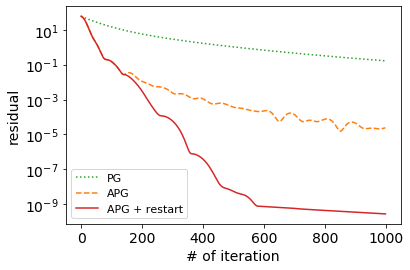

In [33]:
fs=14
plt.figure()
plt.plot(resPG,color="C2",ls="dotted",label="PG")
plt.plot(resAPG,color="C1",ls="dashed",label="APG")
plt.plot(resAPGr,color="C3",ls="solid",label="APG + restart")
plt.legend(fontsize=11)
plt.yscale("log")
plt.ylabel("residual",fontsize=fs)
plt.xlabel("# of iteration",fontsize=fs)
plt.tick_params(labelsize=fs)
plt.savefig("NNLS.pdf")